In [1]:
import statsmodels.api as sm
import sklearn as sk
import matplotlib.pylab as plt
import seaborn as sns

### missingno 패키지

In [2]:
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=[3])
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [3]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [4]:
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

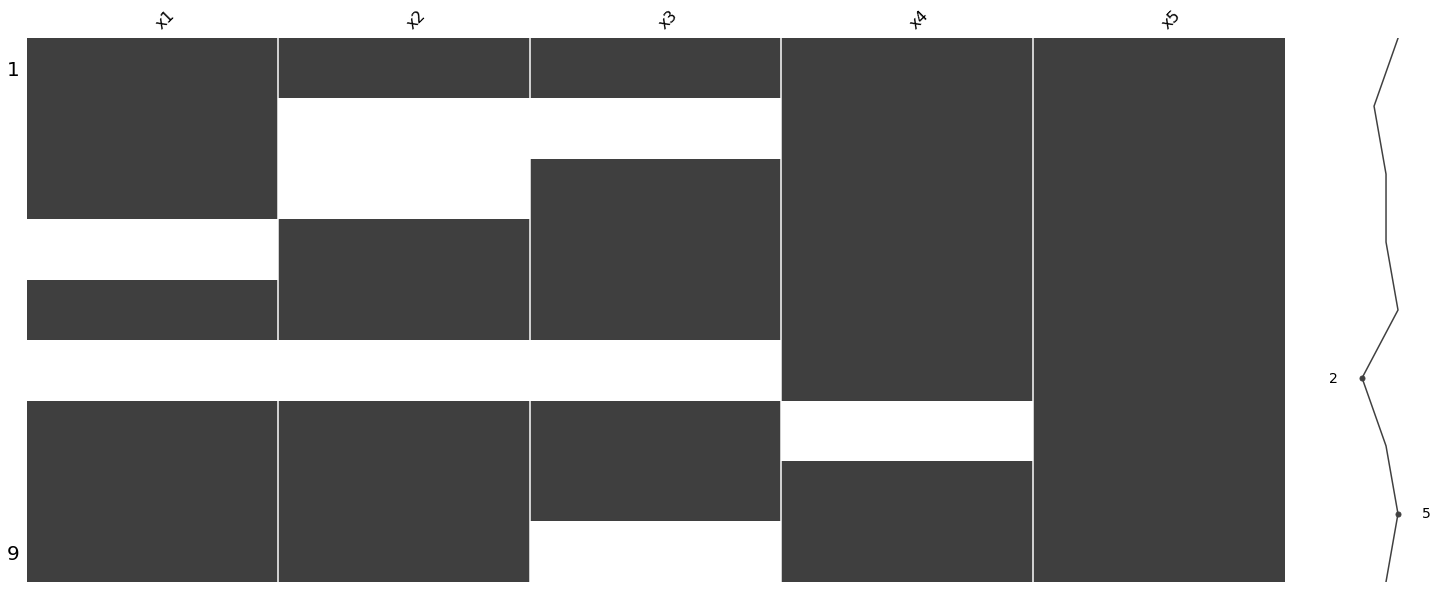

In [5]:
import missingno as msno

msno.matrix(df)
plt.show()

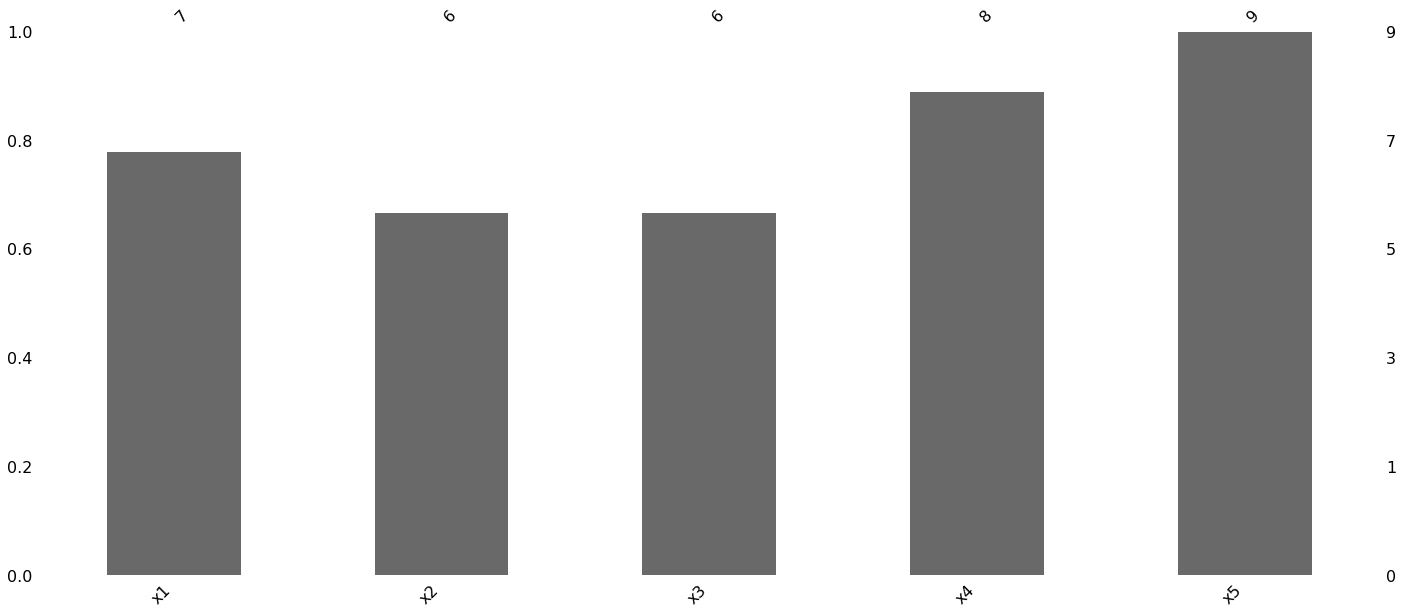

In [6]:
msno.bar(df)
plt.show()

In [7]:
titanic = sns.load_dataset("titanic")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


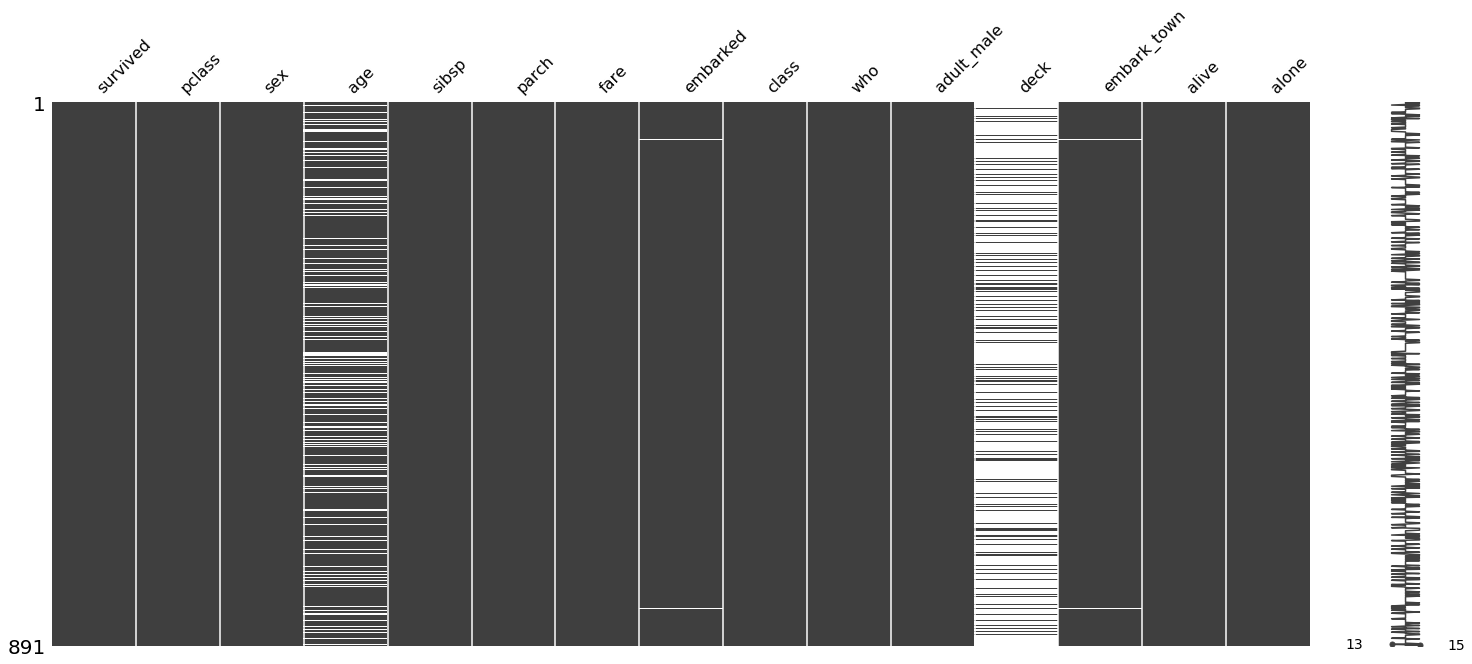

In [8]:
msno.matrix(titanic)

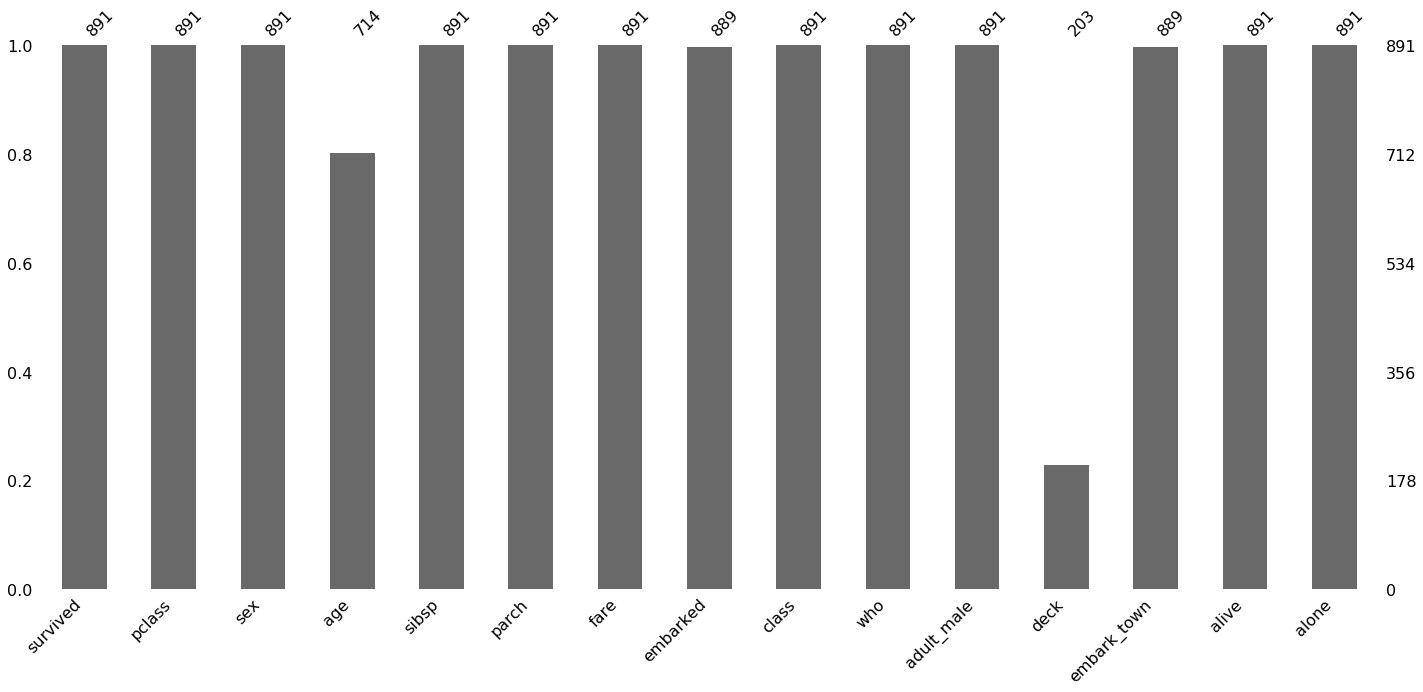

In [9]:
msno.bar(titanic)

In [10]:
# 결측이 존재하는 모든 행 삭제
df.dropna()

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
4,5,0.5,5.0,2019-01-05,B
7,8,0.8,8.0,2019-01-08,B


In [11]:
# 결측이 존재하는 모든 열 삭제
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


In [12]:
# 특정 갯수 이상의 비결측 데이터가 있는 행 또는 열만 남긴다.
# 아래는 7개 이상의 비결측 데이터가 있는경우 남겼음
df.dropna(thresh=7, axis=1)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,<NA>,2019-01-04,A
4,5,2019-01-05,B
5,<NA>,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


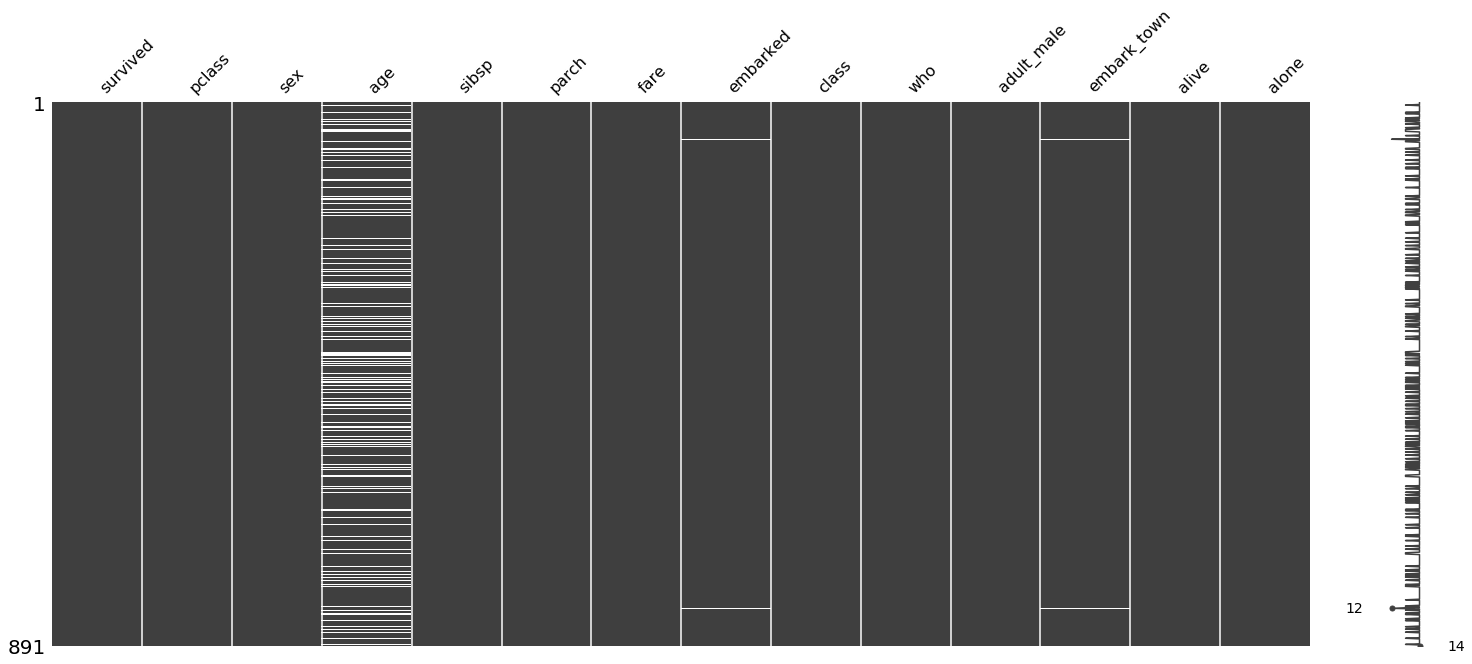

In [13]:
# 데이터가 절반 이상이 없는 열을 삭제
titanic = titanic.dropna(thresh=int(len(titanic) * 0.5), axis=1)
msno.matrix(titanic)
plt.show()

#### 결측데이터 대체

In [16]:
from sklearn.impute import SimpleImputer

In [61]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit_transform(df)

df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from c

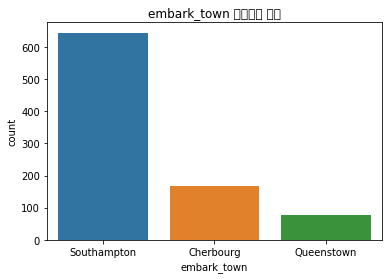

In [62]:
sns.countplot(titanic.embark_town)
plt.title("embark_town 데이터의 분포")
plt.show()

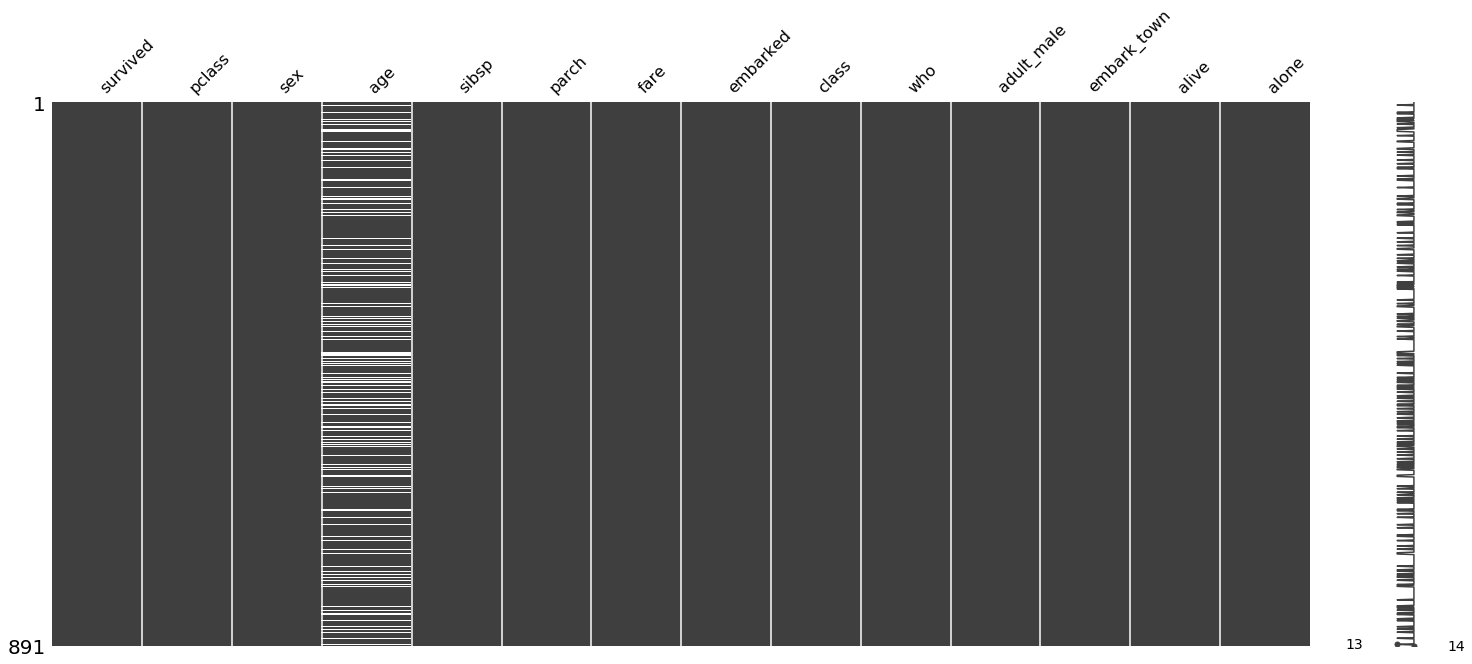

In [34]:
from sklearn.impute import SimpleImputer

imputer_embark_town = SimpleImputer(strategy="most_frequent")
titanic["embark_town"] = imputer_embark_town.fit_transform(titanic[["embark_town"]])
titanic["embarked"] = imputer_embark_town.fit_transform(titanic[["embarked"]])

msno.matrix(titanic)
plt.show()

C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from c

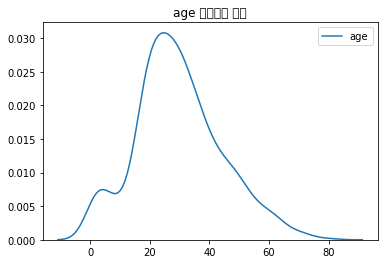

In [36]:
# 나이는 실수형이라 최빈값이 없음
# 평균이나 중앙값을 써야하는데
# 비대칭이거나 이상값이 있는경우 평균보다 중앙값을 사용
sns.kdeplot(titanic.age)
plt.title("age 데이터의 분포")
plt.show()

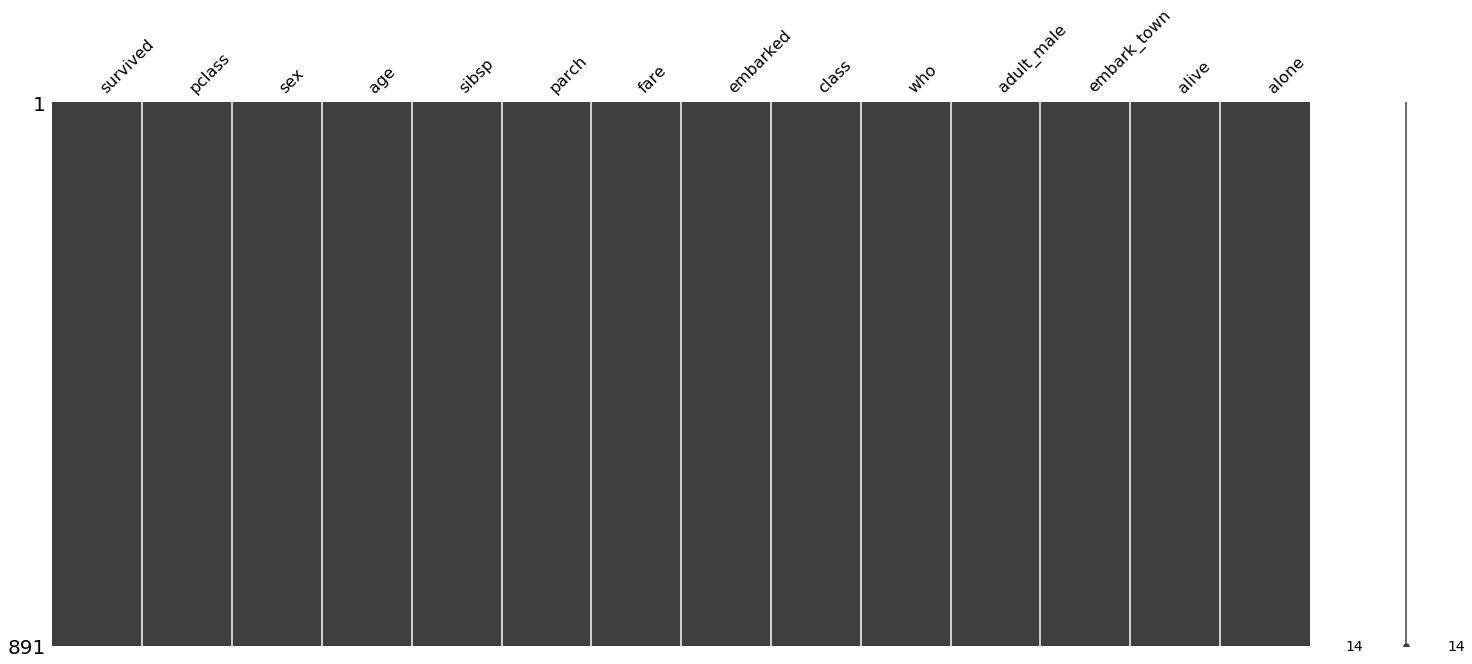

In [37]:
imputer_age = SimpleImputer(strategy="median")
titanic["age"] = imputer_embark_town.fit_transform(titanic[["age"]])

msno.matrix(titanic)
plt.show()

### patsy 패키지 - 전처리

In [19]:
from patsy import demo_data

df = pd.DataFrame(demo_data("x1", "x2", "x3", "x4", "x5"))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [26]:
from patsy import dmatrix

####  프레임에 상수항을 추가하거나 원하는 데이터만 선택하거나 변형할 수 있다.

In [29]:
# 뽑고자 하는 열 이름을 +로 묶어서 첫번째 인수로 넣어줌
dmatrix("x1 + 0", data=df)

DesignMatrix with shape (5, 1)
       x1
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x1' (column 0)

In [31]:
# +0은 상수항 추가하지 말라는 뜻
dmatrix("x1 + x2 + x3 + 0", data=df)

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [32]:
dmatrix("x1 + x2 + x3", data=df)

DesignMatrix with shape (5, 4)
  Intercept       x1        x2       x3
          1  1.76405  -0.97728  0.14404
          1  0.40016   0.95009  1.45427
          1  0.97874  -0.15136  0.76104
          1  2.24089  -0.10322  0.12168
          1  1.86756   0.41060  0.44386
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x3' (column 3)

In [37]:
dmatrix("survived+pclass+age+0",data=titanic)

DesignMatrix with shape (714, 3)
  survived  pclass  age
         0       3   22
         1       1   38
         1       3   26
         1       1   35
         0       3   35
         0       1   54
         0       3    2
         1       3   27
         1       2   14
         1       3    4
         1       1   58
         0       3   20
         0       3   39
         0       3   14
         1       2   55
         0       3    2
         0       3   31
         0       2   35
         1       2   34
         1       3   15
         1       1   28
         0       3    8
         1       3   38
         0       1   19
         0       1   40
         0       2   66
         0       1   28
         0       1   42
         0       3   21
         0       3   18
  [684 rows omitted]
  Terms:
    'survived' (column 0)
    'pclass' (column 1)
    'age' (column 2)
  (to view full data, use np.asarray(this_obj))

In [39]:
# 정의된 함수에대하여 적용후 출력도 가능
def ten_times(x):
    return 10 * x

dmatrix("ten_times(x1)", df)

DesignMatrix with shape (5, 2)
  Intercept  ten_times(x1)
          1       17.64052
          1        4.00157
          1        9.78738
          1       22.40893
          1       18.67558
  Terms:
    'Intercept' (column 0)
    'ten_times(x1)' (column 1)

#### 상호작용
```
두 변수를 곱해서 만들어지는 새로운 변수
```

In [41]:
# :로 상효작용 표시
dmatrix("x1 + x2 + x1:x2 + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [43]:
# 두 변수와 상호작용을 한꺼번에 표시(위와 동일한 것)
dmatrix("x1 * x2 + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

### 스케일링
```
선형회귀분석을 할 때는 조건수(condition number)의 영향때문에 
데이터의 평균을 0으로 표준편차를 1로 만드는 스케일링(scaling) 작업을 
하는 것이 분석 결과의 품질을 높일 수 있다.

center(): 평균을 0으로 스케일링
standardize(): 평균을 0으로하고 표준편차를 1로 스케일링
scale(): standardize() 과 같음
```

In [44]:
# x1데이터의 평균을 제거하는 스케일링
dm = dmatrix("center(x1) + 0", df)
dm

DesignMatrix with shape (5, 1)
  center(x1)
     0.31377
    -1.05012
    -0.47154
     0.79061
     0.41728
  Terms:
    'center(x1)' (column 0)

In [45]:
# 위와 같은내용
df.x1 - np.mean(df.x1)

0    0.313773
1   -1.050123
2   -0.471542
3    0.790613
4    0.417278
Name: x1, dtype: float64

In [48]:
# 이때 평균값은 design_info라는 속성 내부에 저장
# 학습이 끝난 후 이 모형을 사용하여 실제 예측을 할 때 새로운 검증용 데이터를 
# 이 모형에 넣으려면 모형을 학습할 때 사용한 것과 동일한 전처리를 해야 한다. 
# 이 때 학습용 데이터의 평균값을 빼야 함. 때문에 전처리 과정에서 계산한 평균값 필요
dm.design_info.factor_infos

{EvalFactor('center(x1)'): FactorInfo(factor=EvalFactor('center(x1)'),
            type='numerical',
            state=<factor state>,
            num_columns=1)}

### sklearn.preprocessing 패키지 - 스케일링

In [49]:
X = np.arange(7).reshape(-1, 1)  
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

```
fit_transform()
1.평균과 표준편차 계산
2.계산된 값으로 평균이0 표준편차가1이 되도록 scaling
```

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [51]:
# 만약 데이터 집합에 다른 데이터와 동떨어진 아웃라이어가 존재하는 경우에는 
# 스케일링을 했을 때 데이터가 0이 아닌 다른 곳으로 모일 수 있다.

In [52]:
X2 = np.vstack([X, [[1000]]])
X2

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

In [53]:
scaler.fit_transform(X2)

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

In [55]:
# 이렇게 아웃라이어가 존재하는경우에는 로버스트스케일러를 사용
# 중앙값이 0, IQR(interquartile range)이 1이 되도록 변환
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit_transform(X2)

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

#### FunctionTransformer 클래스는 사용자가 지정한 함수를 사용하여 입력값  x 를 변환

In [85]:
X = 90 * np.arange(9).reshape(-1, 1) 
X

array([[  0],
       [ 90],
       [180],
       [270],
       [360],
       [450],
       [540],
       [630],
       [720]])

C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54632 missing from c

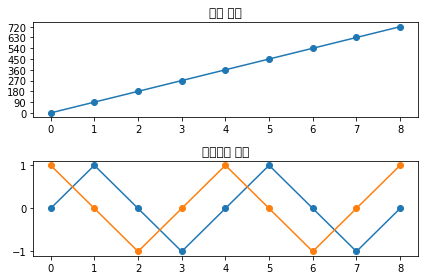

In [86]:
from sklearn.preprocessing import FunctionTransformer

def degree2sincos(X):
    x0 = np.sin(X * np.pi / 180)
    x1 = np.cos(X * np.pi / 180)
    X_new = np.hstack([x0, x1])
    return X_new

X2 = FunctionTransformer(degree2sincos).fit_transform(X)

plt.subplot(211)
plt.plot(X, marker="o")
plt.yticks(X.flatten())
plt.title("각도 표현")
plt.subplot(212)
plt.plot(X2, marker="o")
plt.title("삼각함수 표현")
plt.tight_layout()
plt.show()

### patsy 패키지를 사용한 더미변수화

In [87]:
df1 = pd.DataFrame(["Male", "Female"], columns=["x"])
df1

,x
0,Male
1,Female


In [89]:
from patsy import dmatrix
dmatrix("x + 0", df1)

DesignMatrix with shape (2, 2)
  x[Female]  x[Male]
          0        1
          1        0
  Terms:
    'x' (columns 0:2)

In [90]:
df2 = pd.DataFrame(["A", "B", "AB", "O"], columns=["x"])
df2

,x
0,A
1,B
2,AB
3,O


In [91]:
# 더미변수는 알파벳 순으로 생성됨
dmatrix("x + 0", df2)

DesignMatrix with shape (4, 4)
  x[A]  x[AB]  x[B]  x[O]
     1      0     0     0
     0      0     1     0
     0      1     0     0
     0      0     0     1
  Terms:
    'x' (columns 0:4)

In [92]:
df3 = pd.DataFrame([1, 2, 3, 4], columns=["x"])
df3

,x
0,1
1,2
2,3
3,4


In [93]:
# 범주형이 정수형으로 기입된 경우 C(x)를 사용
dmatrix("C(x) + 0", df3)

DesignMatrix with shape (4, 4)
  C(x)[1]  C(x)[2]  C(x)[3]  C(x)[4]
        1        0        0        0
        0        1        0        0
        0        0        1        0
        0        0        0        1
  Terms:
    'C(x)' (columns 0:4)

In [95]:
# C(x,levels=[])를 사용해서 순서도 정할 수 있음
dm = dmatrix("C(x, levels=['A', 'B', 'AB', 'O']) + 0", df2)
dm

DesignMatrix with shape (4, 4)
  Columns:
    ["C(x, levels=['A', 'B', 'AB', 'O'])[A]",
     "C(x, levels=['A', 'B', 'AB', 'O'])[B]",
     "C(x, levels=['A', 'B', 'AB', 'O'])[AB]",
     "C(x, levels=['A', 'B', 'AB', 'O'])[O]"]
  Terms:
    "C(x, levels=['A', 'B', 'AB', 'O'])" (columns 0:4)
  (to view full data, use np.asarray(this_obj))

### 축소랭크 방식

In [97]:
# dmatrix에서 +0을 안해주면 축소랭크 방식으로 생성
dmatrix("x", df1)

DesignMatrix with shape (2, 2)
  Intercept  x[T.Male]
          1          1
          1          0
  Terms:
    'Intercept' (column 0)
    'x' (column 1)

In [99]:
# 기준값을 알파벳순이 아니라 지정하고 싶은경우
dmatrix("C(x, Treatment('Male'))", df1)

DesignMatrix with shape (2, 2)
  Intercept  C(x, Treatment('Male'))[T.Female]
          1                                  0
          1                                  1
  Terms:
    'Intercept' (column 0)
    "C(x, Treatment('Male'))" (column 1)

In [100]:
dmatrix("x", df2)

DesignMatrix with shape (4, 4)
  Intercept  x[T.AB]  x[T.B]  x[T.O]
          1        0       0       0
          1        0       1       0
          1        1       0       0
          1        0       0       1
  Terms:
    'Intercept' (column 0)
    'x' (columns 1:4)

### 두개의 범주형 변수가 있는경우

#### 통합 축소형 방식

In [101]:
df4 = pd.DataFrame([["A", "X"], ["B", "X"], ["A", "Y"], ["B", "Y"]], columns=["x1", "x2"])
df4

,x1,x2
0,A,X
1,B,X
2,A,Y
3,B,Y


In [102]:
dmatrix("x1 + x2", df4)

DesignMatrix with shape (4, 3)
  Intercept  x1[T.B]  x2[T.Y]
          1        0        0
          1        1        0
          1        0        1
          1        1        1
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)

#### 상호작용 방식

In [103]:
dmatrix("x1:x2 + 0", df4)

DesignMatrix with shape (4, 4)
  x1[A]:x2[X]  x1[B]:x2[X]  x1[A]:x2[Y]  x1[B]:x2[Y]
            1            0            0            0
            0            1            0            0
            0            0            1            0
            0            0            0            1
  Terms:
    'x1:x2' (columns 0:4)

#### 연습문제4.1.1

In [108]:
from sklearn.datasets import fetch_california_housing

In [127]:
california = fetch_california_housing()

In [128]:
# reshape는 행렬을 재구조화 함 
# reshape(-1,1) -1을 넣어 1열이 될수있도록 행개수를 가변적으로 만든것
california=pd.DataFrame(np.concatenate([california.data, california.target.reshape(-1, 1)],axis=1), columns=california.feature_names+["target"])

In [130]:
california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


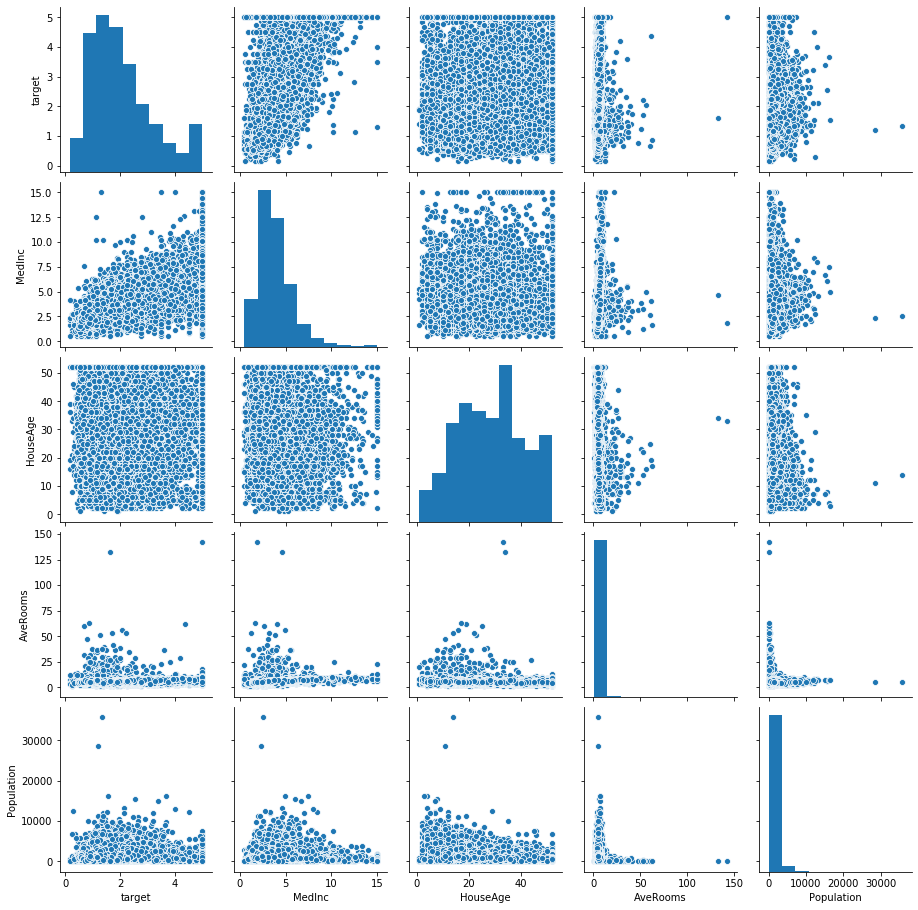

In [131]:
sns.pairplot(california[["target", "MedInc", "HouseAge", "AveRooms","Population"]])
plt.show()

### 가상데이터 예측

C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0, flags=flags)


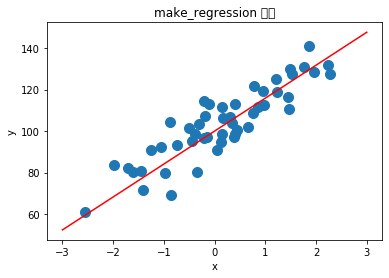

In [132]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0
)

xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression 예제")
plt.show()

In [133]:
X

array([[-0.85409574],
       [ 1.49407907],
       [-0.34791215],
       [ 0.44386323],
       [-0.18718385],
       [ 1.86755799],
       [ 0.4105985 ],
       [-1.70627019],
       [-1.42001794],
       [ 0.8644362 ],
       [ 0.97873798],
       [-0.20515826],
       [ 0.15494743],
       [-0.50965218],
       [ 1.53277921],
       [-0.74216502],
       [-1.45436567],
       [-0.10321885],
       [-2.55298982],
       [ 1.76405235],
       [-1.25279536],
       [-0.97727788],
       [ 0.04575852],
       [-0.4380743 ],
       [ 0.76103773],
       [ 0.14404357],
       [-0.21274028],
       [ 1.20237985],
       [-0.38732682],
       [ 2.2408932 ],
       [ 0.77749036],
       [ 0.15634897],
       [-1.61389785],
       [ 1.9507754 ],
       [ 0.40015721],
       [ 1.46935877],
       [ 1.45427351],
       [-0.30230275],
       [ 0.3130677 ],
       [ 0.33367433],
       [ 2.26975462],
       [-0.15135721],
       [ 0.12167502],
       [ 0.37816252],
       [ 0.6536186 ],
       [ 0

In [134]:
y

array([ 69.16576208, 129.94932345,  80.01389923, 100.30585701,
       107.20314663, 140.88561123, 112.99506826,  82.25108224,
        71.56780523, 111.67769684, 112.48530888, 114.65029223,
       111.71570029, 101.63406761, 127.78240131,  93.08609825,
        80.69164687, 113.11903254,  61.0218126 , 131.15670173,
        91.08078405,  79.88503003,  90.81838842,  95.10877879,
       108.56190647,  98.64651153,  96.63568503, 125.15577947,
        98.56417169, 131.95814648, 121.75870162, 106.25707916,
        80.40782312, 128.46531432,  98.60107781, 110.84947303,
       116.3307515 , 103.39347869, 106.6868286 , 103.97656433,
       127.6988851 ,  97.31416893,  94.52678796,  96.96377225,
       101.80069439, 119.35745   , 118.85230744, 104.32382223,
        92.40639334,  83.7664334 ])

In [135]:
w

array(15.89695836)

#### 연습문제 4.1.2

In [137]:
?make_regression

In [168]:
def make_regression2(n_samples, bias, noise, random_state):
    np.random.seed(random_state)
    x=np.random.normal(size=n_samples).T
    w=100*np.random.normal(size=1)[0]
    y_0=x * w+bias
    e=np.random.normal(scale=noise,size=n_samples)
    y=y_0+e
    return x,y,w

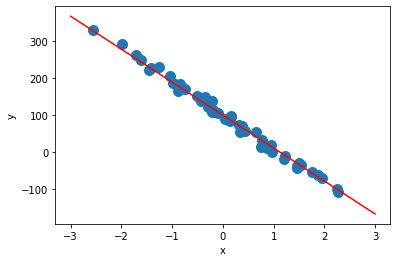

In [169]:
X, y, w = make_regression2(n_samples=50,  bias=100, noise=10,  random_state=0)

xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 4.2선형회귀분석의 기초

### 상수항 결합

In [171]:
X0 = np.arange(10).reshape(5, 2)
X0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [173]:
import statsmodels.api as sm
# 상수항을 추가해주는 함수 add_constant
X = sm.add_constant(X0)
X

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

### Numpy를 이용한 선형 회귀 분석

In [175]:
from sklearn.datasets import make_regression

bias = 100
# 회귀에 사용할 데이터 만듦
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
# 상수항 추가
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [176]:
w

array(86.44794301)

In [178]:
# OLS 해를 직접 이용하는 방법
# 위와 유사하지만 완벽히 똑같지는 않은 w가 만들어짐
# 잡음 noise때문
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49437 missing from c

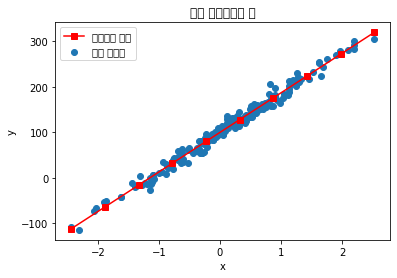

In [179]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)  # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="원래 데이터")
plt.plot(x_new, y_new, 'rs-', label="회귀분석 예측")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.legend()
plt.show()

### scikit-learn 패키지를 사용한 선형 회귀분석

In [185]:
import sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [197]:
# 1) LinearRegression객체 생성
# fit_intercept 인수는 모형에 상수항이 있는가 없는가
# True로 하면 알아서 상수항 추가해줌 add_constant없이도
# 2) fit 메서드로 가중치값 추정
model = LinearRegression().fit(X0, y)
print(model.intercept_, model.coef_)

[99.79150869] [[86.96171201]]


In [198]:
# 3) predict 메서드로 새로운 입력 데이터에 대한 출력 데이터 예측
# 값으로 2차원 배열을 써야한다는 점을 주의
model.predict([[-2], [-1], [0], [1], [2]])

array([[-74.13191534],
       [ 12.82979668],
       [ 99.79150869],
       [186.7532207 ],
       [273.71493272]])

### statsmodels 패키지를 사용한 선형 회귀분석
```
1) 독립변수와 종속변수가 모두 포함된 데이터프레임 생성. 상수항 결합은 하지 않아도 된다.(form_formula안쓰면 상수항 결합 해야함
2)fit 메서드로 모형 추정, 추정한 내용RegressionResults라는 클래스로 따록 출력
RegressionResults 클래스 객체는 결과 리포트용 summary 메서드와 예측을 위한 prediction 메서드를 제공
```

In [201]:
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)
df = pd.DataFrame({"x": X0[:, 0], "y": y[:, 0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [206]:
# 방법1 이방법을 쓰는것이 좋음! ******
# from_formula의 ~왼쪽에 종속 오른쪽에 독립변수 들어가는 양식으로 입력
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()

In [205]:
# 방법2
dfy = df[["y"]]
dfX = sm.add_constant(df[["x"]])
model = sm.OLS(dfy, dfX)
result = model.fit()

In [208]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Fri, 15 May 2020   Prob (F-statistic):          8.17e-182
Time:                        14:37:42   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

In [209]:
# 예측
result.predict({"x":[-2,-1,0,1,2]})

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

In [210]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from c

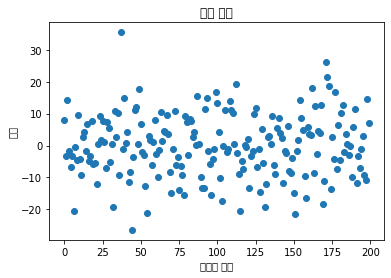

In [211]:
result.resid.plot(style="o")
plt.title("잔차 벡터")
plt.xlabel("데이터 번호")
plt.ylabel("잔차")
plt.show()

In [212]:
# 잔차의 합은 0
result.resid.sum()

3.7196912217041245e-12

In [215]:
# 평균적인 x벡터의 예측값은 y의평균값
result.predict({"x": X0.mean()})

0    109.069351
dtype: float64

In [214]:
y.mean()

109.06935068170773

In [219]:
# 보스턴 집값예측
from sklearn.datasets import load_boston

boston = load_boston()
# X0는 상수항 추가가 안된것
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 15 May 2020   Prob (F-statistic):          6.72e-135
Time:                        14:42:35   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0